# T-DEV_810 - IA for detecting pneumonia

## Requirements

You must have:
* installed keras and matplotlib into your anaconda environment (else run `conda install -c anaconda keras` and `conda install matplotlib`)
* the datasets downloaded from the Epitech Share Point. (else download them from [here](https://epitechfr.sharepoint.com/:f:/r/sites/TDEV810/Documents%20partages/datasets?csf=1&e=3ghePT))

## Imports needed

In [1]:
%matplotlib inline

import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras import regularizers

Using TensorFlow backend.


## Defining path variables

In [2]:
# Directory containing the datasets
DATA_PATH = "./chest_Xray/"

# Train
train_folder= f'{DATA_PATH}train/'
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

# Validation
val_folder = f'{DATA_PATH}val/'
val_n = val_folder+'NORMAL/'
val_p = val_folder+'PNEUMONIA/'

# Test
test_folder = f'{DATA_PATH}test/'
test_n = test_folder+'NORMAL/'
test_p = test_folder+'PNEUMONIA/'

## Test display of images

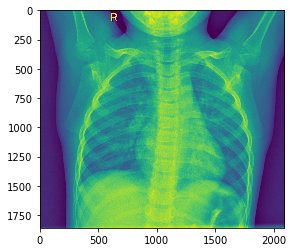

In [3]:
normal_example_name = os.listdir(f'{train_n}')[0]
normal_img = plt.imread(f'{train_n}/{normal_example_name}')
plt.imshow(normal_img)

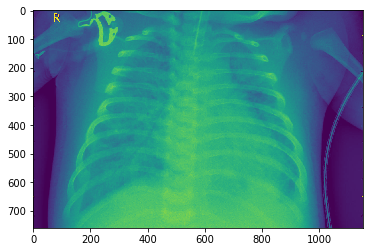

In [4]:
pneumonia_example_name = os.listdir(f'{train_p}')[0]
pneumonia_img = plt.imread(f'{train_p}/{pneumonia_example_name}')
plt.imshow(pneumonia_img)

## Defining Hyperparameters

In [5]:
# DATA

# General parameters
imageSize = (64, 64)  ## If this changes, please update the input_shape of the first neurons layer

# Training parameters
trainImageRescaleRatio = 1./255
trainBatchSize = 1
trainDataClassMode = 'binary'
learningRate = .0002

# Validating parameters
validationImageRescaleRatio = 1./255
validationBatchSize = 1
validationDataClassMode = 'binary'
validationSteps = 16

# Testing parameters
testImageRescaleRatio = 1./255
testBatchSize = 10
testDataClassMode = 'binary'



# MODEL

# Train 
epochs = 50
stepsPerEpoch = 250
lossFunction = 'binary_crossentropy'

## Defining CNN model

We use a CNN model because it is the best technologie when it coms to image recognition.



In [6]:
# CNN model

cnn = Sequential()

# Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)))

# Pooling
cnn.add(MaxPooling2D(pool_size = (3, 3)))

# Flatten the layer
cnn.add(Flatten())

# Fully Connected Layers
cnn.add(Dense(activation = 'relu', units = 32, kernel_regularizer=regularizers.l2(0.01)))
cnn.add(Dense(activation = 'sigmoid', units = 1)) ## Using sigmoid to asses weight of activated nodes

# Compile the Neural network
cnn.compile(Adam(lr=learningRate), loss = lossFunction, metrics = ['accuracy'])

# summary
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 20, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12800)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                409632    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 410,561
Trainable params: 410,561
Non-trainable params: 0
_________________________________________________________________


## Image generators

As we might load a lot of data, it is better to use generators. This will load and normalize the images on the go instead of caching it in the RAM.

It is in the image generators that we can configure the data source, the target size, the batch size and the class mode to use.

In [7]:
# Image generator normalization

## The training data are not only normalized but also reduced to improve training speed
train_datagen = ImageDataGenerator(
    rescale = trainImageRescaleRatio,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = False
)

validation_datagen = ImageDataGenerator(
    rescale = validationImageRescaleRatio
)  

test_datagen = ImageDataGenerator(
    rescale = testImageRescaleRatio
)  



# Image generator settings
print('- Training set: ')
training_set = train_datagen.flow_from_directory(
    f'{train_folder}',
    target_size = imageSize,
    batch_size  = trainBatchSize,
    class_mode  = trainDataClassMode
)

print('\n- Validation set: ')
validation_set = validation_datagen.flow_from_directory(
    f'{val_folder}',
    target_size = imageSize,
    batch_size  = validationBatchSize,
    class_mode  = validationDataClassMode
)

print('\n- Test set: ')
test_set = test_datagen.flow_from_directory(
    f'{test_folder}',
    target_size = imageSize,
    batch_size  = testBatchSize,
    class_mode  = testDataClassMode
)

- Training set: 
Found 398 images belonging to 2 classes.

- Validation set: 
Found 16 images belonging to 2 classes.

- Test set: 
Found 400 images belonging to 2 classes.


## Training

In [8]:
cnn_model = cnn.fit_generator(
    training_set,
    shuffle = True,
    epochs = epochs,
    steps_per_epoch = stepsPerEpoch,
    validation_data = validation_set,
    validation_steps = validationSteps
)

Epoch 1/50
250/250 [==============================] - 5s 19ms/step - loss: 0.6987 - accuracy: 0.5160 - val_loss: 0.7601 - val_accuracy: 0.5000
Epoch 2/50
250/250 [==============================] - 4s 17ms/step - loss: 0.6893 - accuracy: 0.5560 - val_loss: 0.6191 - val_accuracy: 0.5000
Epoch 3/50
250/250 [==============================] - 4s 17ms/step - loss: 0.6748 - accuracy: 0.6040 - val_loss: 0.5689 - val_accuracy: 0.5625
Epoch 4/50
250/250 [==============================] - 5s 19ms/step - loss: 0.6500 - accuracy: 0.6400 - val_loss: 0.8478 - val_accuracy: 0.6250
Epoch 5/50
250/250 [==============================] - 4s 18ms/step - loss: 0.5971 - accuracy: 0.6800 - val_loss: 0.7109 - val_accuracy: 0.6250
Epoch 6/50
250/250 [==============================] - 4s 17ms/step - loss: 0.5757 - accuracy: 0.7600 - val_loss: 0.9404 - val_accuracy: 0.8750
Epoch 7/50
250/250 [==============================] - 4s 17ms/step - loss: 0.5053 - accuracy: 0.7800 - val_loss: 1.3544 - val_accuracy: 0.6250

## Analysing the result

In [9]:
test_accu = cnn.evaluate_generator(test_set)
print('The testing accuracy is :',test_accu[1]*100, '%')

The testing accuracy is : 86.00000143051147 %


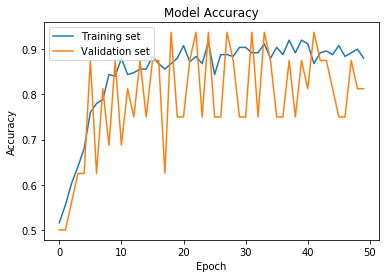

In [10]:
# Accuracy 
plt.plot(cnn_model.history['accuracy'])
plt.plot(cnn_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

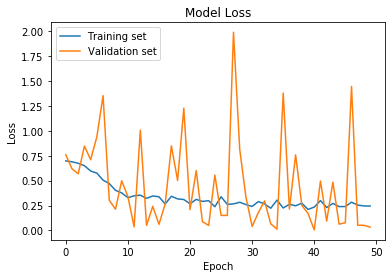

In [11]:
# Loss 
plt.plot(cnn_model.history['loss'])
plt.plot(cnn_model.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()